In [442]:
import nltk
import pandas as pd

## Read dataset

In [443]:
messages = pd.read_csv('python_data/spam.csv', encoding = 'latin-1')

print(messages.columns)
messages.head()

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN


## Data exploration

In [444]:
messages = messages.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1) #columns = ['Unnamed: 2', 'Unnamed: 2', 'Unnamed: 2'], axis = 1)
messages.columns = ['label', 'text']
messages.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [445]:
messages.shape

(5572, 2)

In [446]:
messages['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [447]:
print(messages['label'].isnull().sum())   # no null values in column 'label'
print(messages['text'].isnull().sum())   # no null values in column 'text'

0
0


## Data cleaning

In [448]:
pd.set_option('display.max_colwidth', 150)
messages.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [449]:
import string, re

stopwords = nltk.corpus.stopwords.words('english')

def clean_text(text):
    text = ''.join([char.lower() for char in text if char not in string.punctuation])
    tokens = re.split('\W+', text)
    text_nostop = [word for word in tokens if word not in stopwords]
    return text_nostop

#messages['text_nostop'] = messages['text'].apply(lambda x : clean_text(x))

messages.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


## TfidfVectorizer

In [555]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(messages['text'])

print(X_tfidf.shape)
print(tfidf_vect.get_feature_names_out())

(5572, 9395)
['' '0' '008704050406' ... 'ûïharry' 'ûò' 'ûówell']


In [451]:
X_features = pd.DataFrame(X_tfidf.toarray())
X_features.head()

,0,1,2,3,4,5,6,7,8,9,...,9385,9386,9387,9388,9389,9390,9391,9392,9393,9394
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Random Forest Classifier

In [452]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split


#dir(RandomForestClassifier)

In [453]:
X_train, X_test, y_train, y_test = train_test_split(X_features, messages['label'], test_size = 0.2)

In [454]:
rf = RandomForestClassifier()  #(n_estimators = 100, max_depth = None, n_jobs = -1)

In [455]:
rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [456]:
precision = precision_score(y_test, y_pred, pos_label = 'spam')
recall = recall_score(y_test, y_pred, pos_label = 'spam')

print('Precision: {} / recall: {}'.format(round(precision, 3), round(recall, 3)))

Precision: 1.0 / recall: 0.813


## Word2Vec

In [457]:
!pip install -U gensim

Defaulting to user installation because normal site-packages is not writeable


In [458]:
import gensim
import gensim.downloader as api

In [459]:
wiki_embeddings = api.load('glove-wiki-gigaword-100')

In [460]:
wiki_embeddings['king']

array([-0.32307 , -0.87616 ,  0.21977 ,  0.25268 ,  0.22976 ,  0.7388  ,
       -0.37954 , -0.35307 , -0.84369 , -1.1113  , -0.30266 ,  0.33178 ,
       -0.25113 ,  0.30448 , -0.077491, -0.89815 ,  0.092496, -1.1407  ,
       -0.58324 ,  0.66869 , -0.23122 , -0.95855 ,  0.28262 , -0.078848,
        0.75315 ,  0.26584 ,  0.3422  , -0.33949 ,  0.95608 ,  0.065641,
        0.45747 ,  0.39835 ,  0.57965 ,  0.39267 , -0.21851 ,  0.58795 ,
       -0.55999 ,  0.63368 , -0.043983, -0.68731 , -0.37841 ,  0.38026 ,
        0.61641 , -0.88269 , -0.12346 , -0.37928 , -0.38318 ,  0.23868 ,
        0.6685  , -0.43321 , -0.11065 ,  0.081723,  1.1569  ,  0.78958 ,
       -0.21223 , -2.3211  , -0.67806 ,  0.44561 ,  0.65707 ,  0.1045  ,
        0.46217 ,  0.19912 ,  0.25802 ,  0.057194,  0.53443 , -0.43133 ,
       -0.34311 ,  0.59789 , -0.58417 ,  0.068995,  0.23944 , -0.85181 ,
        0.30379 , -0.34177 , -0.25746 , -0.031101, -0.16285 ,  0.45169 ,
       -0.91627 ,  0.64521 ,  0.73281 , -0.22752 , 

In [461]:
wiki_embeddings.most_similar('king')

[('prince', 0.7682329416275024),
 ('queen', 0.7507690787315369),
 ('son', 0.7020888328552246),
 ('brother', 0.6985775828361511),
 ('monarch', 0.6977889537811279),
 ('throne', 0.6919989585876465),
 ('kingdom', 0.6811409592628479),
 ('father', 0.680202841758728),
 ('emperor', 0.6712857484817505),
 ('ii', 0.6676074266433716)]

In [462]:
messages['text_clean_gensim'] = messages['text'].apply(lambda x : gensim.utils.simple_preprocess(x))
messages.head()

,label,text,text_clean_gensim
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...","[go, until, jurong, point, crazy, available, only, in, bugis, great, world, la, buffet, cine, there, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...,"[free, entry, in, wkly, comp, to, win, fa, cup, final, tkts, st, may, text, fa, to, to, receive, entry, question, std, txt, rate, apply, over]"
3,ham,U dun say so early hor... U c already then say...,"[dun, say, so, early, hor, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, don, think, he, goes, to, usf, he, lives, around, here, though]"


In [463]:
X_train, X_test, y_train, y_test = train_test_split(messages['text_clean_gensim'], messages['label'], test_size = 0.2)

In [464]:
w2v_model = gensim.models.Word2Vec(X_train, vector_size = 100, window = 5, min_count = 2)

In [465]:
w2v_model.wv['king']

array([-3.0562928e-02,  7.0354141e-02,  3.4949709e-02, -8.4008463e-03,
        2.8023813e-05, -1.1927729e-01,  5.2627463e-02,  1.6278061e-01,
       -5.7258192e-02, -3.6508914e-02, -4.9297959e-02, -1.0186521e-01,
        2.9962030e-03,  2.8844822e-02,  2.3044646e-02, -3.3936571e-02,
       -1.8521622e-03, -1.1453145e-01, -2.9555710e-02, -1.7721914e-01,
        4.6306476e-02,  4.9913101e-02,  7.2948396e-02, -6.4145476e-02,
       -9.4667086e-03, -7.9196142e-03, -5.3544279e-02, -4.9756534e-02,
       -4.0109254e-02,  3.1799015e-02,  8.2537457e-02,  1.1476127e-02,
        6.1183736e-02, -5.0726883e-02, -5.8955323e-02,  1.1060757e-01,
        2.0436512e-02, -8.0320641e-02, -1.6643550e-02, -1.2186232e-01,
       -2.0094290e-02, -8.1346579e-02, -2.8892808e-02,  1.4435691e-02,
        6.8305068e-02, -4.7051568e-02, -3.2057237e-02, -1.2923687e-02,
        6.7312740e-02,  6.1196435e-02,  3.7950743e-02, -4.6479356e-02,
       -3.0356323e-02, -3.3258021e-02, -3.4040686e-02,  1.9090708e-02,
      

In [466]:
w2v_model.wv.most_similar('king')

[('www', 0.9961568713188171),
 ('ìï', 0.996148943901062),
 ('went', 0.9960287809371948),
 ('com', 0.9959315657615662),
 ('jus', 0.9959218502044678),
 ('per', 0.9959032535552979),
 ('had', 0.9958897829055786),
 ('uk', 0.9958668351173401),
 ('lor', 0.9958648085594177),
 ('going', 0.9958573579788208)]

In [467]:
w2v_model.wv.index_to_key[0:10]

['to', 'you', 'the', 'and', 'in', 'is', 'me', 'my', 'it', 'for']

In [556]:
import numpy as np
w2v_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in w2v_model.wv.index_to_key]) for ls in X_test])
#w2v_vect

In [557]:
#for i, v in enumerate(w2v_vect):
#    print(len(X_test.iloc[i]), len(v))

In [470]:
w2v_vect_avg = []
for vect in w2v_vect:
    if len(vect) != 0:
        w2v_vect_avg.append(vect.mean(axis = 0))
    else:
        w2v_vect_avg.append(np.zeros(100))


In [558]:
#for i, v in enumerate(w2v_vect_avg):
#    print(len(X_test.iloc[i]), len(v))

## Doc2Vec

In [472]:
X_train, X_test, y_train, y_test = train_test_split(messages['text_clean_gensim'], messages['label'], test_size = 0.2)

tagged_docs = [gensim.models.doc2vec.TaggedDocument(v, [i]) for i, v in enumerate(X_train)]

tagged_docs[0]

TaggedDocument(words=['ah', 'poor', 'baby', 'hope', 'urfeeling', 'bettersn', 'luv', 'probthat', 'overdose', 'of', 'work', 'hey', 'go', 'careful', 'spk', 'sn', 'lots', 'of', 'lovejen', 'xxx'], tags=[0])

In [473]:
d2v_model = gensim.models.Doc2Vec(tagged_docs, vector_size = 100, window = 5, min_count = 2)
d2v_model.infer_vector(['i', 'am', 'learning', 'nlp'])

array([-0.00328922,  0.00834541, -0.00085594, -0.00413698,  0.00342533,
       -0.02558143, -0.00290246,  0.03566356, -0.00936335, -0.00739871,
       -0.00675392, -0.01909826, -0.0015561 ,  0.00769733, -0.00639739,
       -0.0115028 ,  0.00447061, -0.01829534,  0.00031071, -0.03503658,
       -0.00042556,  0.00309191,  0.0098708 , -0.006493  ,  0.00253213,
       -0.00287848, -0.01248276, -0.00568882, -0.01084815, -0.0087539 ,
        0.01156934,  0.0070498 ,  0.00933268, -0.0046143 , -0.00559106,
        0.01360213,  0.00596248, -0.01388805, -0.00877572, -0.02050494,
       -0.00479912, -0.01237847, -0.01371798, -0.00155838,  0.00605557,
       -0.01021594, -0.01486014,  0.00024634,  0.010631  ,  0.01035734,
        0.00104473, -0.00769249, -0.0029075 ,  0.00126665, -0.00049349,
        0.00923697,  0.00820557, -0.00602587, -0.01843893,  0.01443826,
        0.00995549, -0.00449755, -0.00029103,  0.00325415, -0.01242705,
        0.00905406,  0.01151578,  0.00830174, -0.01457835,  0.01

In [474]:
vectors = [[d2v_model.infer_vector(words)] for words in X_test]
vectors[0]

[array([-8.50158464e-03, -3.46121669e-04, -1.24675035e-02, -1.30913202e-02,
        -2.59945844e-03, -2.77636386e-02, -1.30201783e-02,  5.89409051e-03,
         1.30559262e-02, -6.29349472e-03, -8.78251158e-04, -5.54221624e-04,
        -1.24175623e-02, -7.70104211e-03, -1.02232900e-02, -1.77489722e-03,
        -7.11622601e-03, -1.22282030e-02,  2.40260153e-04, -2.24151220e-02,
        -1.11393984e-02, -1.60882005e-03, -6.50516292e-03, -1.08518442e-02,
        -5.78283561e-06, -1.58080191e-04,  7.58420734e-04,  3.35994503e-03,
        -1.61482880e-04, -1.03085479e-02, -9.49084666e-03,  1.44394320e-02,
         4.42564022e-04,  1.28565934e-02, -6.04132796e-03,  5.43063926e-03,
         1.25735975e-03, -2.40566693e-02, -6.31631166e-03, -2.47991458e-03,
        -5.89195546e-03, -3.18601029e-03, -1.55842677e-02, -1.46410556e-03,
         8.12954828e-03, -1.21371355e-02, -6.83227507e-03, -1.84589333e-03,
        -3.18211550e-03, -2.70293583e-03,  1.66670326e-03,  1.11742492e-03,
         1.5

## Recurrent Neural Network

In [475]:
pd.set_option('display.max_colwidth', 150)

messagesRNN = pd.read_csv('python_data/spam.csv', encoding = 'latin-1')

messagesRNN = messagesRNN.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1) #columns = ['Unnamed: 2', 'Unnamed: 2', 'Unnamed: 2'], axis = 1)
messagesRNN.columns = ['label', 'text']
#print(messagesRNN.head())

labels = np.where(messagesRNN['label'] == 'spam', 1, 0)
labels

array([0, 0, 1, ..., 0, 0, 0])

In [476]:
XRNN_train, XRNN_test, yRNN_train, yRNN_test = train_test_split(messagesRNN['text'], labels, test_size = 0.2)

In [538]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

def recall_m(y_true, y_red):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives/(possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [478]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(XRNN_train)

In [479]:
X_train_seq = tokenizer.texts_to_sequences(XRNN_train)
X_test_seq = tokenizer.texts_to_sequences(XRNN_test)

X_train_seq[0]

[29, 2571, 1, 58, 16, 47, 13, 141]

In [480]:
X_train_seq_padded = pad_sequences(X_train_seq, 50)
X_test_seq_padded = pad_sequences(X_test_seq, 50)

X_train_seq_padded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,   29, 2571,
          1,   58,   16,   47,   13,  141])

In [481]:
import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

In [482]:
model = Sequential()

model.add(Embedding(len(tokenizer.index_word) + 1, 32))
model.add(LSTM(32, dropout = 0, recurrent_dropout = 0))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 32)          254240    
                                                                 
 lstm_6 (LSTM)               (None, 32)                8320      
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 263,649
Trainable params: 263,649
Non-trainable params: 0
_________________________________________________________________


In [539]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', precision_m, recall_m])

In [540]:
history = model.fit(X_train_seq_padded, yRNN_train, batch_size = 32, epochs = 10, 
                    validation_data = (X_test_seq_padded, yRNN_test))

Epoch 1/10
140/140 [==============================] - 4s 15ms/step - loss: 0.6795 - accuracy: 0.7961 - precision_m: 0.0986 - recall_m: 60.0000 - val_loss: 0.4520 - val_accuracy: 0.8484 - val_precision_m: 0.0286 - val_recall_m: 58.2857
Epoch 2/10
140/140 [==============================] - 2s 11ms/step - loss: 0.3769 - accuracy: 0.8672 - precision_m: 0.0071 - recall_m: 59.5714 - val_loss: 0.4353 - val_accuracy: 0.8547 - val_precision_m: 0.0286 - val_recall_m: 58.2857
Epoch 3/10
140/140 [==============================] - 2s 12ms/step - loss: 0.3320 - accuracy: 0.8714 - precision_m: 0.2274 - recall_m: 59.5714 - val_loss: 0.4728 - val_accuracy: 0.8422 - val_precision_m: 0.0476 - val_recall_m: 58.2857
Epoch 4/10
140/140 [==============================] - 2s 11ms/step - loss: 0.2680 - accuracy: 0.8921 - precision_m: 0.5918 - recall_m: 59.5714 - val_loss: 0.5565 - val_accuracy: 0.7749 - val_precision_m: 0.1140 - val_recall_m: 58.2857
Epoch 5/10
140/140 [==============================] - 2s 12m

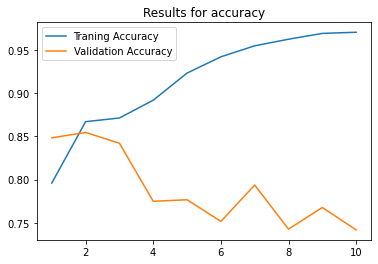

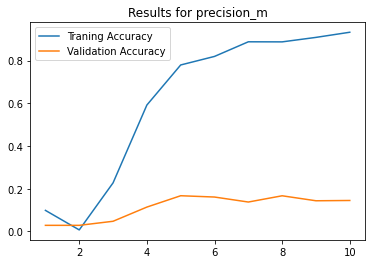

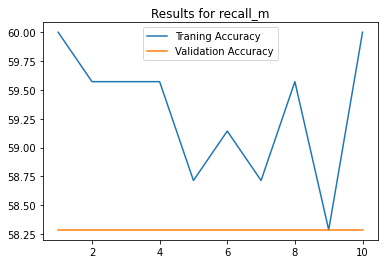

In [541]:
import matplotlib.pyplot as plt

for i in ['accuracy', 'precision_m', 'recall_m']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) +  1)
    
    plt.figure()
    plt.plot(epochs, acc, label = 'Traning Accuracy')
    plt.plot(epochs, val_acc, label = 'Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()

## Compare NLP Techniques: Prep the Data for Modeling

In [486]:
messages = pd.read_csv('python_data/spam.csv', encoding = 'latin-1')
messages = messages.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1) #columns = ['Unnamed: 2', 'Unnamed: 2', 'Unnamed: 2'], axis = 1)
messages.columns = ['label', 'text']
messages['label'] = np.where(messages['label'] == 'spam', 1, 0)
messages.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"


In [487]:
stopwords = nltk.corpus.stopwords.words('english')

def clean_text(text):
    text = ''.join([char.lower() for char in text if char not in string.punctuation])
    tokens = re.split('\W+', text)
    text_nostop = [word for word in tokens if word not in stopwords]
    return text_nostop

messages['clean_text'] = messages['text'].apply(lambda x : clean_text(x))

messages.head()

,label,text,clean_text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,0,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 084528..."
3,0,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"


In [488]:
X_train, X_test, y_train, y_test = train_test_split(messages['clean_text'], messages['label'], test_size = 0.2)

X_train[0:10]

2168                                                                                                 [thx, well, months]
2500                                                                                        [remember, ask, alex, pizza]
2532                                                                                                           [yup, ok]
886                                                                                   [like, talk, pa, able, dont, know]
3158                                                                                                 [challenge, know, ]
4062                                                                                                   [ages, hows, abj]
2458                                                                                          [cool, ill, text, im, way]
2998                                                                                   [oh, phone, phoned, disconnected]
1144    [really, tot, ur, paper,

In [489]:
y_train[0:10]
y_test[0:10]

2577    0
2983    0
1102    0
854     0
1797    0
3697    0
2878    0
5088    0
4562    0
2973    0
Name: label, dtype: int32

In [490]:
X_train.to_csv('python_data/X_train.csv', index = False, header = True)
X_test.to_csv('python_data/X_test.csv', index = False, header = True)
y_train.to_csv('python_data/y_train.csv', index = False, header = True)
y_test.to_csv('python_data/y_test.csv', index = False, header = True)

#### 1. TF-IDF Vectors

In [491]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [492]:
X_train = pd.read_csv('python_data/X_train.csv')
X_test = pd.read_csv('python_data/X_test.csv')
y_train = pd.read_csv('python_data/y_train.csv')
y_test = pd.read_csv('python_data/y_test.csv')

X_train.head()
y_test.head()

,label
0,0
1,0
2,0
3,0
4,0


In [493]:
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train['clean_text'])

X_train_vect = tfidf_vect.transform(X_train['clean_text'])
X_test_vect = tfidf_vect.transform(X_test['clean_text'])

In [559]:
#tfidf_vect.vocabulary_

In [495]:
X_train_vect[0]

<1x8219 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [496]:
X_train_vect[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [497]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_model = rf.fit(X_train_vect, y_train.values.ravel())

In [498]:
y_pred = rf_model.predict(X_test_vect)

In [499]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Precision: {} / Recall: {}  / Accuracy: {}'.format(round(precision, 3), round(recall, 3), 
                                                          round((y_pred == y_test['label']).sum()/len(y_pred), 3)))

Precision: 1.0 / Recall: 0.725  / Accuracy: 0.963


#### 2. Word2Vec

In [500]:
import gensim
import numpy as np
import pandas as pd

X_train = pd.read_csv('python_data/X_train.csv')
X_test = pd.read_csv('python_data/X_test.csv')
y_train = pd.read_csv('python_data/y_train.csv')
y_test = pd.read_csv('python_data/y_test.csv')

In [501]:
w2v_model = gensim.models.Word2Vec(X_train, vector_size = 100, window = 5, min_count = 2)

In [502]:
words = set(w2v_model.wv.index_to_key)

X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_train['clean_text']])

X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_test['clean_text']])

C:\Users\yliu\AppData\Local\Temp\ipykernel_13688\2767401476.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_train['clean_text']])
C:\Users\yliu\AppData\Local\Temp\ipykernel_13688\2767401476.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_test['clean_text']])


In [503]:
y_test['label'].dtype

dtype('int64')

In [504]:
X_train_vect_avg = []

for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis = 0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype = float))
        
        
X_test_vect_avg = []

for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis = 0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype = float))

In [560]:
#X_test_vect[0]

In [561]:
#X_test_vect_avg[0]

In [507]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_model = rf.fit(X_train_vect_avg, y_train.values.ravel())

y_pred = rf_model.predict(X_test_vect_avg)

In [508]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Precision: {} / Recall: {}  / Accuracy: {}'.format(round(precision, 3), round(recall, 3), 
                                                          round((y_pred == y_test['label']).sum()/len(y_pred), 3)))

Precision: 0.413 / Recall: 0.174  / Accuracy: 0.857


#### 3. Doc2Vec

In [509]:
import gensim
import numpy as np
import pandas as pd

X_train = pd.read_csv('python_data/X_train.csv')
X_test = pd.read_csv('python_data/X_test.csv')
y_train = pd.read_csv('python_data/y_train.csv')
y_test = pd.read_csv('python_data/y_test.csv')

In [510]:
tagged_docs_train = [gensim.models.doc2vec.TaggedDocument(v, [i]) for i, v in enumerate(X_train['clean_text'])]
tagged_docs_test = [gensim.models.doc2vec.TaggedDocument(v, [i]) for i, v in enumerate(X_test['clean_text'])]

tagged_docs_train[:10]

[TaggedDocument(words="['thx', 'well', 'months']", tags=[0]),
 TaggedDocument(words="['remember', 'ask', 'alex', 'pizza']", tags=[1]),
 TaggedDocument(words="['yup', 'ok']", tags=[2]),
 TaggedDocument(words="['like', 'talk', 'pa', 'able', 'dont', 'know']", tags=[3]),
 TaggedDocument(words="['challenge', 'know', '']", tags=[4]),
 TaggedDocument(words="['ages', 'hows', 'abj']", tags=[5]),
 TaggedDocument(words="['cool', 'ill', 'text', 'im', 'way']", tags=[6]),
 TaggedDocument(words="['oh', 'phone', 'phoned', 'disconnected']", tags=[7]),
 TaggedDocument(words="['really', 'tot', 'ur', 'paper', 'ended', 'long', 'ago', 'wat', 'u', 'copied', 'jus', 'got', 'use', 'u', 'happy', 'lar', 'still', 'haf', '2', 'study', '']", tags=[8]),
 TaggedDocument(words="['da', 'good', 'good', 'playerwhy', 'unsold']", tags=[9])]

In [511]:
d2v_model = gensim.models.Doc2Vec(tagged_docs_train, vector_size = 100, window = 5, min_count = 2)

In [512]:
train_vector = [d2v_model.infer_vector(eval(v.words)) for v in tagged_docs_train]
test_vector = [d2v_model.infer_vector(eval(v.words)) for v in tagged_docs_test]

In [513]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_model = rf.fit(train_vector, y_train.values.ravel())

y_pred = rf_model.predict(test_vector)

In [516]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Precision: {} / Recall: {}  / Accuracy: {}'.format(round(precision, 3), round(recall, 3), 
                                                          round((y_pred == y_test['label']).sum()/len(y_pred), 3)))

Precision: 0.9 / Recall: 0.362  / Accuracy: 0.909


#### 4. RNN Model

In [543]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import pandas as pd

X_train = pd.read_csv('python_data/X_train.csv')
X_test = pd.read_csv('python_data/X_test.csv')
y_train = pd.read_csv('python_data/y_train.csv')
y_test = pd.read_csv('python_data/y_test.csv')

def recall_m(y_true, y_red):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives/(possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [544]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['clean_text'])
X_train_seq = tokenizer.texts_to_sequences(X_train['clean_text'])
X_test_seq = tokenizer.texts_to_sequences(X_test['clean_text'])

In [545]:
X_train_seq_padded = pad_sequences(X_train_seq, 50)
X_test_seq_padded = pad_sequences(X_test_seq, 50)

In [546]:
import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential


In [552]:
model = Sequential()
model.add(Embedding(len(tokenizer.index_word) + 1, 32))
model.add(LSTM(32, dropout = 0, recurrent_dropout = 0))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 32)          264032    
                                                                 
 lstm_11 (LSTM)              (None, 32)                8320      
                                                                 
 dense_22 (Dense)            (None, 32)                1056      
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 273,441
Trainable params: 273,441
Non-trainable params: 0
_________________________________________________________________


In [553]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', precision_m, recall_m])

history = model.fit(X_train_seq_padded, y_train, batch_size = 32, epochs = 10, 
                    validation_data = (X_test_seq_padded, y_test))

Epoch 1/10
140/140 [==============================] - 4s 15ms/step - loss: 0.2804 - accuracy: 0.9033 - precision_m: 0.4406 - recall_m: 58.2857 - val_loss: 0.0928 - val_accuracy: 0.9713 - val_precision_m: 0.9423 - val_recall_m: 58.2857
Epoch 2/10
140/140 [==============================] - 2s 12ms/step - loss: 0.0335 - accuracy: 0.9906 - precision_m: 0.9613 - recall_m: 58.7143 - val_loss: 0.0651 - val_accuracy: 0.9821 - val_precision_m: 0.9564 - val_recall_m: 58.2857
Epoch 3/10
140/140 [==============================] - 2s 12ms/step - loss: 0.0087 - accuracy: 0.9975 - precision_m: 0.9893 - recall_m: 59.5714 - val_loss: 0.0750 - val_accuracy: 0.9839 - val_precision_m: 0.9679 - val_recall_m: 58.2857
Epoch 4/10
140/140 [==============================] - 2s 12ms/step - loss: 0.0025 - accuracy: 0.9993 - precision_m: 0.9771 - recall_m: 58.7143 - val_loss: 0.0898 - val_accuracy: 0.9830 - val_precision_m: 0.9714 - val_recall_m: 58.2857
Epoch 5/10
140/140 [==============================] - 2s 12m

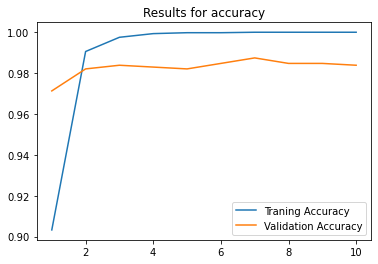

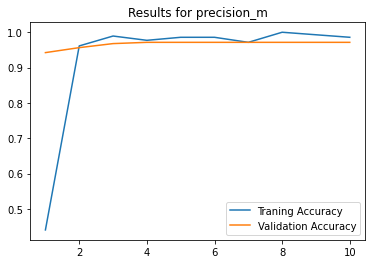

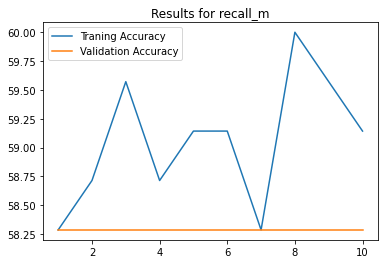

In [554]:
import matplotlib.pyplot as plt

for i in ['accuracy', 'precision_m', 'recall_m']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) +  1)
    
    plt.figure()
    plt.plot(epochs, acc, label = 'Traning Accuracy')
    plt.plot(epochs, val_acc, label = 'Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()